# A2-Q3: Parametric Spline

In [1]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

## (a) Write your nickname and display it

In [2]:
# See A2.pdf for detail

## (b) Hardcode interpolation points

In [3]:
# === YOUR CODE HERE ===
x1 = [4.2, 3.3, 2.3, 3.8]
y1 = [6.4, 5, 3.3, 2.5]

x2 = [7, 5.4, 5, 7, 6]
y2 = [3.1, 4, 4.8, 5, 4]

x3 = [10, 9, 9, 10, 10.8, 10]
y3 = [2.5, 3, 4, 4.6, 4, 2.5]

## (c) `ParametricSpline`

In [4]:
def MySpline(x, y):
    '''
     S = MySpline(x, y)

     Input:
       x and y are arrays (or lists) of corresponding x- and y-values,
       specifying the points in the x-y plane.  The x-values
       must be in increasing order.

     Output:
       S is a function that takes x or an array (or list) of x-values
         It evaluates the cubic spline and returns the interpolated value.

     Implementation:
       
       Hence...
         a[0] = a_0          b[0] = b_1        c[0] = c_1
         a[1] = a_1          b[1] = b_2        c[1] = c_2
              :                   :                 :
         a[n-2] = a_(n-2)    b[n-2] = b_(n-1)  c[n-2] = c_(n-1)
         a[n-1] = a_(n-1)
         
       The polynomial piece is evaluated at xx using
       
         p_i(xx) = a[i]*(x[i+1]-xx)**3/(6*hi) + a[i+1]*(xx-x[i])**3/(6*hi) +
                   b[i]*(x[i+1]-xx) + c[i]*(xx-x[i])

       where hk = x[k+1] - x[k] for k = 0, ... , n-1
    '''
    n = len(x)
    h = np.zeros(n-1)
    b = np.zeros(n-1)
    c = np.zeros(n-1)
    a = np.zeros(n)
    
    M = np.zeros((n,n))
    r = np.zeros(n)

    
    # === YOUR CODE HERE ===
    
    # Turn non-list-like input into list-like
    if type(x) not in (list, np.ndarray,):
        x = [x]
            
    if type(y) not in (list, np.ndarray,):
        y = [y]
    
    # Using natural boundary, we let a_0 = a_{n-1} = 0
    a[0] = 0
    a[n - 1] = 0
    
    # get h-values
    idx = 0
    while idx < n - 1:
        h[idx] = x[idx + 1] - x[idx]
        idx += 1
    
    # Construct the matrix M and r
    idx = 0
    while idx < n:
        if idx == 0 or idx == n - 1:
            M[idx, idx] = 1
            r[idx] = 0
        else:
            M[idx, idx - 1] = h[idx - 1] / 6
            M[idx, idx] = (h[idx - 1] + h[idx]) / 3
            M[idx, idx + 1] = h[idx] / 6
            r[idx] = (y[idx + 1] - y[idx]) / h[idx] - (y[idx] - y[idx - 1]) / h[idx - 1]
        idx += 1
             
            
    # Solve the linear system to get a-values
    Inv_M = np.linalg.inv(M)
    a = np.dot(Inv_M, r)
    
    # based on a-values, calculate b and c's values
    idx = 0
    while idx < n - 1:
        b[idx] = y[idx] / h[idx] - (a[idx] * h[idx]) / 6
        c[idx] = y[idx + 1] / h[idx] - a[idx + 1] * (h[idx] / 6)
        idx += 1

    #======================================
    #
    # This is the function that gets returned.
    # It evaluates the cubic spline at xvals.
    #
    
    x.sort()
    def spline(xvals, x=x, a=a, b=b, c=c):
        '''
         S = spline(xvals)
         
         Evaluates the cubic spline at xvals.
         
         Inputs:
          xvals can be list-like, or a scalar (**must be in ascending order**)
          
         Output:
          S is a list of values with the same number of elements as x
        '''
        # Turn non-list-like input into list-like
        if type(xvals) not in (list, np.ndarray,):
            xvals = [xvals]
        
        S = []  # The return list of values
        
        # 
        k = 0   # this is the current polynomial piece
        hk = x[k+1] - x[k]

        for xx in xvals:

            # If the next x-value is not on the current piece...
            if xx>x[k+1]:
                # ... Go to next piece
                k += 1
                hk = x[k+1] - x[k]

            S_of_x = a[k]*(x[k+1]-xx)**3/(6*hk) + a[k+1]*(xx-x[k])**3/(6*hk) + b[k]*(x[k+1]-xx) + c[k]*(xx-x[k])

            S.append(S_of_x)
        
        return S
    #======================================
    
    return spline

In [5]:
def ParametricSpline(Sx,Sy):
    '''
     x_cs, y_cs, t = ParametricSpline(Sx,Sy)

       Takes an array of x- and y-values, and returns a parametric
       cubic spline in the form of two piecewise-cubic data structures
       (one for the x-component and one for the y-component), as well as
       the corresponding parameter values.
       
       The splines use natural boundary conditions.

       Input:
        Sx   array of x-values
        Sy   array of y-values

       Output:
        x_cs function that evaluates the cubic spline for x-component
        y_cs function that evaluates the cubic spline for y-component
        t is the array of parameter values use for the splines

       Note that x_cs(t) and y_cs(t) give Sx and Sy, respectively.
    '''

    # These lines are just placeholders... replace them
    x_cs = lambda t:[0]
    y_cs = lambda t:[0]
    n = len(Sx)
    t = np.zeros(n)
    
    # === YOUR CODE HERE ===
    
    # initializa t
    t[0] = 0
    idx = 1
    while idx < n:
        t[idx] = t[idx - 1] + np.sqrt((Sx[idx] - Sx[idx - 1]) ** 2 + (Sy[idx] - Sy[idx - 1]) ** 2)
        idx += 1
        
        
        
        
        
    x_cs = MySpline(t, Sx)
    
    y_cs = MySpline(t, Sy)
    
    return x_cs, y_cs, t




## (d) Find parametric splines for each segment

In [6]:
# === YOUR CODE HERE ===

# Call the function
SInfo1 = ParametricSpline(x1, y1)
Sx1 = SInfo1[0]             # The x-parametric spline of the first segment
Sy1 = SInfo1[1]             # The y-parametric spline of the first segment
t1 = SInfo1[-1]             # The t range of the first segment

SInfo2 = ParametricSpline(x2, y2)
Sx2 = SInfo2[0]             # The x-parametric spline of the second segment
Sy2 = SInfo2[1]             # The y-parametric spline of the second segment
t2 = SInfo2[-1]             # The t range of the second segment

SInfo3 = ParametricSpline(x3, y3)
Sx3 = SInfo3[0]             # The x-parametric spline of the third segment
Sy3 = SInfo3[1]             # The y-parametric spline of the third segment
t3 = SInfo3[-1]             # The t range of the third segment




## (e) Plot the segments

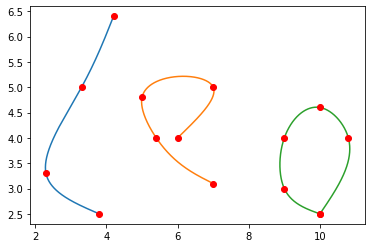

In [7]:
# === YOUR CODE HERE ===

# Plot the first segment
tt1 = np.linspace(t1[0], t1[-1], 1000)
plt.plot(Sx1(tt1), Sy1(tt1))
plt.plot(x1,y1,'ro');

# Plot the second segment
tt2 = np.linspace(t2[0], t2[-1], 1000)
plt.plot(Sx2(tt2), Sy2(tt2))
plt.plot(x2,y2,'ro');

# Plot the third segment
tt3 = np.linspace(t3[0], t3[-1], 1000)
plt.plot(Sx3(tt3), Sy3(tt3))
plt.plot(x3,y3,'ro');